# Forest Analysis

In [3]:
# imports
import os
import pickle

import numpy as np
import pandas as pd


## Getting Data

In [4]:
data = pd.read_csv('new_Exam_Score_Prediction.csv')

y = data['exam_score']
X = data.drop('exam_score', axis=1)

data

,age,gender,study_hours,class_attendance,internet_access,sleep_hours,sleep_quality,facility_rating,exam_difficulty,exam_score,diploma,group_study,self_study,online_videos,coaching,mixed
0,17,1,2.78,92.9,1,7.4,0,0,2,58.9,1,0,0,0,1,0
1,22,1,7.88,76.8,1,8.5,0,2,1,90.3,0,0,0,0,1,0
2,20,0,0.89,71.6,1,9.8,0,0,1,43.7,1,0,0,0,1,0
3,23,1,3.48,65.4,1,4.2,2,0,1,58.2,0,0,0,0,0,1
4,17,0,1.35,69.0,1,7.4,1,2,2,53.7,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13269,17,1,5.74,81.4,1,7.5,2,2,2,95.0,0,0,0,1,0,0
13270,19,0,3.28,73.3,1,9.5,2,2,0,93.9,0,1,0,0,0,0
13271,18,1,3.71,41.6,0,5.9,1,1,1,60.9,0,0,0,0,1,0
13272,19,1,4.60,76.3,0,6.1,2,1,1,79.0,0,0,1,0,0,0


# Getting Model

In [5]:
with open(os.path.join('pipes', 'Forest.pkl'), 'rb') as f:
    Pipe = pickle.load(f)

Pipe

Pipeline(steps=[('scaler', StandardScaler()),
                ('features_selector',
                 SelectKBest(k=7,
                             score_func=<function f_regression at 0x7f292d1e0d60>)),
                ('regressor',
                 RandomForestRegressor(max_depth=9, n_estimators=123))])

# Metric

In [6]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error


def metric(y_hat, y_true,features_shape):
    n,p = features_shape
    r2 = r2_score(y_true, y_hat)
    socres = {
        "MAE": mean_absolute_error(y_true, y_hat),
        "MSE": mean_squared_error(y_true, y_hat),
        "RMSE": np.sqrt(mean_squared_error(y_true, y_hat)),
        "R2": r2,
        "Adjusted R2":  1 - (1 - r2) * (n - 1) / (n - p - 1)
    }

    df_score = pd.DataFrame(socres.items(), columns=["Metric","Value"])

    return df_score

# Feature Importance

In [7]:
names = X.columns
selector = Pipe.named_steps['features_selector']
mask = selector.get_support()
selected_names = np.array(names)[mask]

test_x = X[selected_names]
test_y = y

forest = Pipe.named_steps['regressor']
forest.fit(test_x, test_y)

RandomForestRegressor(max_depth=9, n_estimators=123)

[]

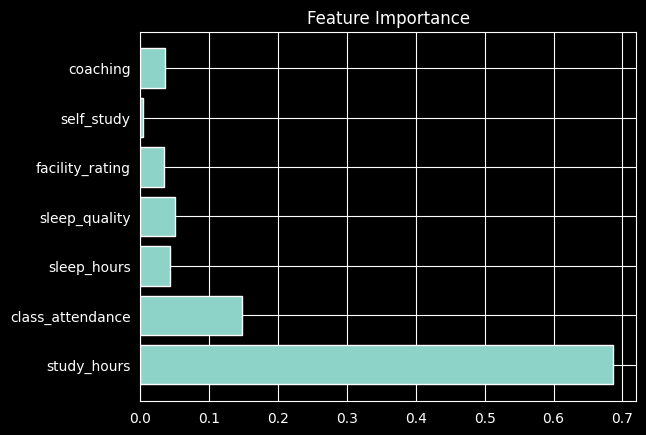

In [8]:
from matplotlib import pyplot as plt

importance = forest.feature_importances_

plt.barh(selected_names, importance)
plt.title("Feature Importance")
plt.plot()

# Drawing a tree

## Building a small tree
upon two best features

In [57]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor

best_features = ['study_hours', 'class_attendance']
x_train, x_test, y_train, y_test = train_test_split(X[best_features], y, test_size = 0.3, random_state = 42)

tree = DecisionTreeRegressor(random_state=42, max_depth=10, max_leaf_nodes=15)

tree.fit(x_train, y_train)

pred = tree.predict(x_train)
metric(pred, y_train, [x_train.shape[0], len(best_features)])

,Metric,Value
0,MAE,9.860253
1,MSE,148.927720
2,RMSE,12.203595
3,R2,0.585070
4,Adjusted R2,0.584981


## Drawing a tree

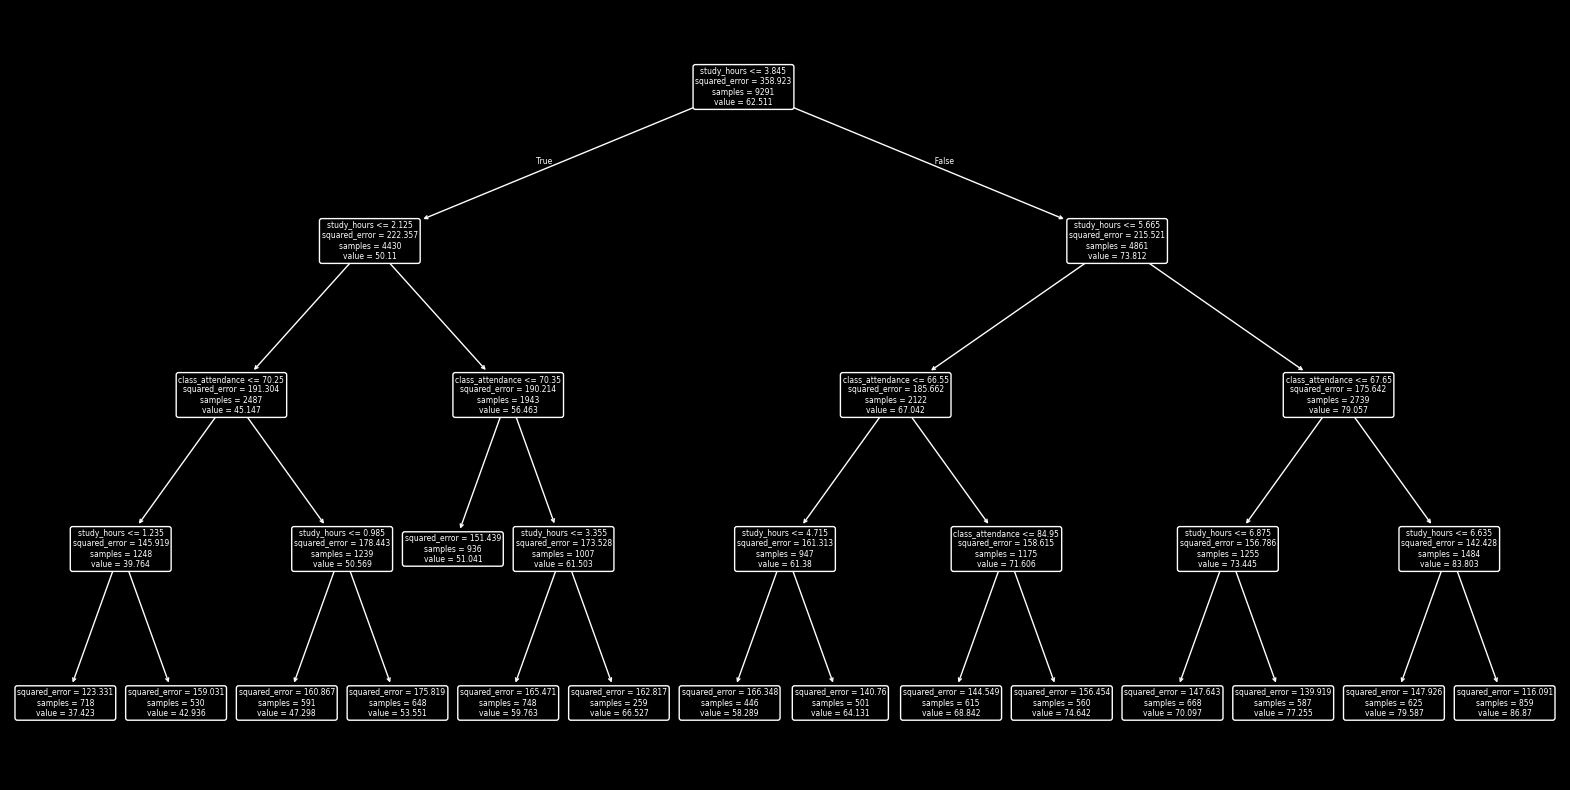

In [58]:
from sklearn.tree import plot_tree

plt.figure(figsize=(20,10))
plot_tree(tree,
          feature_names=best_features,
          filled=False,
          rounded=True)
plt.show()